# Modular Multiplication

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ModDbl`
An n-bit modular doubling gate.

Implements $\ket{x} \rightarrow \ket{2x \mod p}$ using $2n$ Toffoli gates.

#### Parameters
 - `dtype`: Dtype of the number to double.
 - `p`: The modulus for the doubling. 

#### Registers
 - `x`: The register containing the number to double. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Fig 6d and 8


In [2]:
from qualtran.bloqs.mod_arithmetic import ModDbl

### Example Instances

In [3]:
moddbl_small = ModDbl(QUInt(4), 13)

In [4]:
prime = 10**9 + 7
moddbl_large = ModDbl(QUInt(32), prime)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([moddbl_small, moddbl_large],
           ['`moddbl_small`', '`moddbl_large`'])

### Call Graph

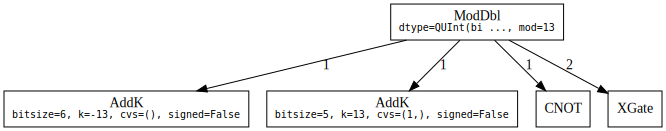

#### Counts totals:
 - `AddK`: 1
 - `AddK`: 1
 - `CNOT`: 1
 - `XGate`: 2

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
moddbl_small_g, moddbl_small_sigma = moddbl_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(moddbl_small_g)
show_counts_sigma(moddbl_small_sigma)

## `CModMulK`
Perform controlled modular multiplication by a constant.

Applies $\ket{c}\ket{c} \rightarrow \ket{c} \ket{x*k^c \mod p}$.

#### Parameters
 - `dtype`: Dtype of the register.
 - `k`: The integer multiplicative constant.
 - `mod`: The integer modulus. 

#### Registers
 - `ctrl`: The control bit
 - `x`: The integer being multiplied


In [7]:
from qualtran.bloqs.mod_arithmetic import CModMulK

### Example Instances

In [8]:
import sympy

k, N, n_x = sympy.symbols('k N n_x')
modmul_symb = CModMulK(QUInt(n_x), k=k, mod=N)

In [9]:
modmul = CModMulK(QUInt(8), k=123, mod=13 * 17)

#### Graphical Signature

In [10]:
from qualtran.drawing import show_bloqs
show_bloqs([modmul_symb, modmul],
           ['`modmul_symb`', '`modmul`'])

### Call Graph

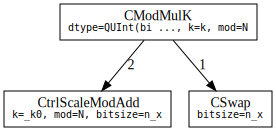

#### Counts totals:
 - `CSwap`: 1
 - `CtrlScaleModAdd`: 2

In [11]:
from qualtran.resource_counting.generalizers import ignore_split_join
modmul_symb_g, modmul_symb_sigma = modmul_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(modmul_symb_g)
show_counts_sigma(modmul_symb_sigma)